In [25]:
import os
os.chdir('/Users/elenapedrini/Desktop/GitHub/QMULHub/')
import wordstovec as wtv
import preprocess_new as pre

In [26]:
preProcessedTrainDF = pre.prepareTrainTestSet('train.csv','test.csv','word2vec',seperateLabelInfo=1)
sent2vec = []
sent2vec = wtv.WordsToVecFunction(preProcessedTrainDF)

In [109]:
rows = []
for i in range(len(sent2vec)):
    vect_components = []
    for j in sent2vec[i][0]:
        vect_components.append(j)
    rows.append(vect_components)
data = pd.DataFrame(rows)

In [111]:
rows = []
vect_components = []
for j in sent2vec[2][0]:
        vect_components.append(round(j,0))
rows.append(vect_components)
data = pd.DataFrame(rows)
print(data.shape)

(159548, 100)


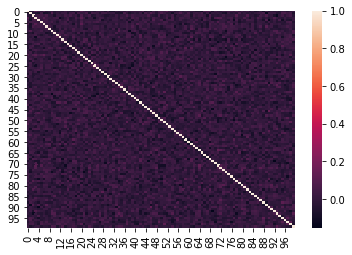

In [112]:
import seaborn as sb
sb.heatmap(data.corr()) 

Except for the main diagonal, for which the color suggests that the correlation of the variables with themselves is 1, the rest of the matrix is characterised by features that present very low correlations between each other.

In [113]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.000045,0.000136,-0.000545,-0.000739,-0.000311,-0.000294,-0.000540,-0.000595,0.000052,-0.000533,...,-0.000496,0.000196,0.000582,0.000602,0.000235,0.000735,0.000934,-0.000085,-0.000139,-0.000079
1,0.000425,0.000494,-0.000450,0.000024,-0.000087,0.000203,-0.000124,0.000159,0.000370,-0.001953,...,-0.001543,0.000222,-0.000535,-0.001131,0.000724,-0.000152,0.000925,-0.000918,0.000205,0.001215
2,-0.000236,0.001245,-0.000507,-0.000585,-0.001592,0.000583,-0.000517,-0.000044,0.000200,0.000407,...,0.000455,0.000613,-0.000630,-0.000226,-0.000082,0.002618,-0.000029,-0.000364,0.000782,-0.000191
3,-0.000472,0.000905,0.000466,0.000101,-0.000387,0.000051,-0.000726,0.000010,-0.000123,-0.000181,...,-0.000419,-0.000270,0.000158,-0.001412,0.000602,0.000279,-0.000828,-0.000746,-0.000603,-0.000641
4,-0.000483,0.000412,0.001668,0.000375,-0.001231,-0.000154,0.000351,0.000441,-0.001458,0.002036,...,-0.000136,0.001074,0.002494,0.002745,0.000396,0.000800,0.000173,0.001934,-0.000339,0.000958


## TARGET: TOXIC

#### Dataset preparation

In [121]:
X = data.values
y = []
for el in sent2vec:
    y.append(el[1][0]) #el[1] is the list of the 6 labels; el[1][0] is the first label corresponding to the toxic class
print(y[:20])

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]


#### Analysis of target

(array([144254.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,  15294.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)

Percentage of toxic comments: 10.0


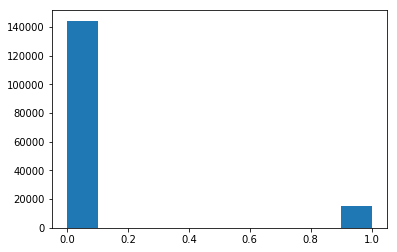

In [139]:
import matplotlib.pyplot as plt
print(plt.hist(y))
print("\nPercentage of toxic comments: "+str(round(sum(y)/len(y),1)*100))

The target is strongly unbalanced.  

In [125]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

/Users/elenapedrini/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Model

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print("Number of samples in the test set: "+str(len(y_test)))
print("Number of toxic comments (target = 1) in the test set: "+str(sum(y_test))+" ("+str(round(sum(y_test)/len(y_test)*100,2))+"% of the total)")

[[43176     0]
 [ 4689     0]]
Number of samples in the test set: 47865
Number of toxic comments (target = 1) in the test set: 4689 (9.8% of the total)


All toxic comments are predicted as non-toxic. The model is not working as expected but the accuracy is quite high.

In [153]:
import sklearn.metrics as skm
print(skm.classification_report(y_test, y_pred))
print("Accuracy: "+str(round(skm.accuracy_score(y_test, y_pred, normalize=True, sample_weight=None),2)))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95     43176
          1       0.00      0.00      0.00      4689

avg / total       0.81      0.90      0.86     47865

Accuracy: 0.9


/Users/elenapedrini/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [160]:
import pickle
#with open("/Users/elenapedrini/Desktop/GitHub/sent2vec.txt", "wb") as fp:   #Pickling
 #  pickle.dump(sent2vec, fp)

with open("/Users/elenapedrini/Desktop/GitHub/sent2vec.txt", "rb") as fp:   # Unpickling
   b = pickle.load(fp)

In [164]:
print(b[0])

[array([-4.48075476e-05,  1.36087466e-04, -5.44584814e-04, -7.38626652e-04,
       -3.11270682e-04, -2.93964697e-04, -5.40390144e-04, -5.94954042e-04,
        5.22608041e-05, -5.32975356e-04,  5.47752601e-04,  4.30858954e-04,
        7.19154196e-04,  1.09896477e-03,  4.72818529e-04, -5.81682483e-04,
       -1.25744373e-03,  6.06335018e-04, -1.28763984e-03, -1.23144344e-03,
       -7.45179909e-04,  2.14713225e-03, -5.59808998e-04, -1.52259956e-03,
        4.76857980e-04, -1.34615393e-04,  1.16144195e-03,  5.84304467e-04,
       -3.04041459e-04,  6.26398633e-04, -9.23430368e-04, -4.70319490e-05,
        2.78271194e-04, -8.52094532e-05, -9.89162848e-04, -1.09687375e-03,
        1.53092942e-04, -4.87312272e-04, -4.49544835e-04,  2.36102803e-06,
        1.37196082e-04, -7.09127071e-04,  5.11195181e-04,  1.87647942e-04,
        4.11334820e-04,  3.66687787e-04,  2.37395620e-04,  1.25918730e-04,
        2.30370742e-04, -4.17159259e-04,  2.76076866e-05, -2.06483756e-04,
       -3.52408334e-04, 